<a href="https://colab.research.google.com/github/JyothiSupriya/Multi-Model-NLP-Framework-for-Unstructured-Text-Analysis/blob/main/NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:

import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
df = pd.read_excel('/content/Data.xlsx')

# Show the content of the DataFrame
#print(df)

docs = df['NARRATIVE'].tolist()
cause=df['CAUSE']

In [ ]:
docs = df.NARRATIVE.tolist()
docs = [str(element) for element in docs]

In [ ]:

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [ ]:

# Get the word count
df['word_count'] = df['NARRATIVE'].apply(word_count) # Apply the function to the 'NARRATIVE' column of the DataFrame
df['word_count'].mean()

192.2409972299169

In [ ]:
# Process the text
df['processed_text'] = df['NARRATIVE'].astype(str).apply(process_text) # Cast the 'NARRATIVE' column to string type before applying the function
df.head()

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,Column1,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE,word_count,processed_text
0,2024-02-22,2024,20240017,39241,ORIGINAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,ELMER SELVERA,elmer.selvera@centerpointenergy.com,281-755-2470,JAMIE HERDOCIA,DIRECTOR GAS OPERATIONAL STANDARDS,713-207-4675,jamie.herdocia@centerpointenergy.com,"ON JANUARY 29 2024, AROUND 4:40PM G3 UNDERGROU...",86,"[januari, pm, underground, sub, onyx, consult,..."
1,2024-02-23,2024,20240019,39252,ORIGINAL,12582,ATMOS ENERGY CORPORATION - MISSISSIPPI,5430 LBJ FREEWAY SUITE 1800,DALLAS,TX,...,DEAN MORRIS,dean.morris@atmosenergy.com,6018425875,JAMES MCKENZIE,VICE PRESIDENT - TECHNICAL SERVICES,6016249408,james.mckenzie@atmosenergy.com,"THE INVESTIGATION, TO WHICH THE MISSISSIPPI PU...",52,"[investig, mississippi, public, servic, commis..."
2,2024-02-23,2024,20240018,39251,ORIGINAL,12582,ATMOS ENERGY CORPORATION - MISSISSIPPI,5430 LBJ FREEWAY SUITE 1800,DALLAS,TX,...,DEAN MORRIS,dean.morris@atmosenergy.com,6018425875,JAMES MCKENZIE,VICE PRESIDENT - TECHNICAL SERVICES,6016249408,james.mckenzie@atmosenergy.com,"THE INVESTIGATION, TO WHICH THE MISSISSIPPI PU...",46,"[investig, mississippi, public, servic, commis..."
3,2024-02-22,2024,20240016,39240,ORIGINAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,ELMER SELVERA,elmer.selvera@centerpointenergy.com,281-755-2470,JAMIE HERDOCIA,DIRECTOR GAS OPERATIONAL STANDARDS,713-207-4675,jamie.herdocia@centerpointenergy.com,"ON THE MORNING OF JANUARY 24, 2024, A WEATHER ...",45,"[morn, januari, weather, event, heavi, rain, h..."
4,2024-02-22,2024,20240015,39239,ORIGINAL FINAL,4499,CENTERPOINT ENERGY RESOURCES CORPORATION,1111 LOUISIANA ST,HOUSTON,TX,...,ELMER SELVERA,elmer.selvera@centerpointenergy.com,281-755-2470,JAMIE HERDOCIA,DIRECTOR GAS OPERATIONAL STANDARDS,713-207-4675,jamie.herdociaaa@centerpointenergy.com,BASED ON SIGNS OF CONSTRUCTION ACTIVITY IN THE...,60,"[base, sign, construct, activ, rear, easement,..."


In [ ]:
df['word_count'].describe()

,word_count
count,1444.000000
mean,192.240997
std,142.124315
min,1.000000
25%,95.000000
50%,158.000000
75%,250.000000
max,820.000000


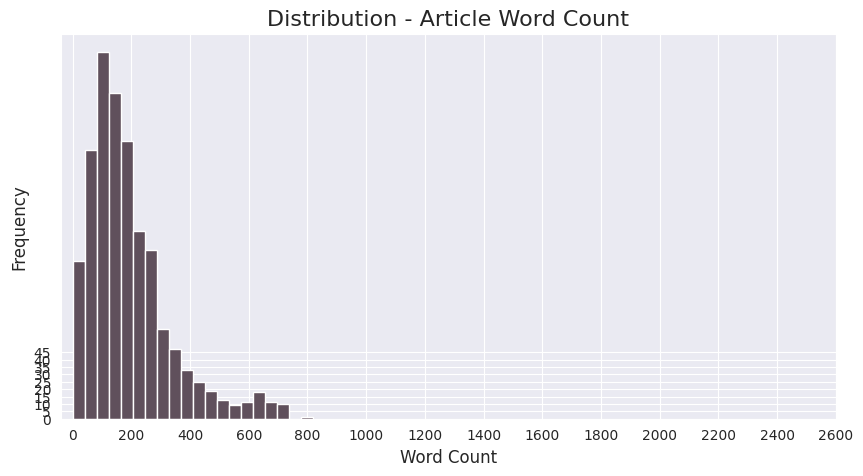

In [ ]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 2700, 200))


plt.show()

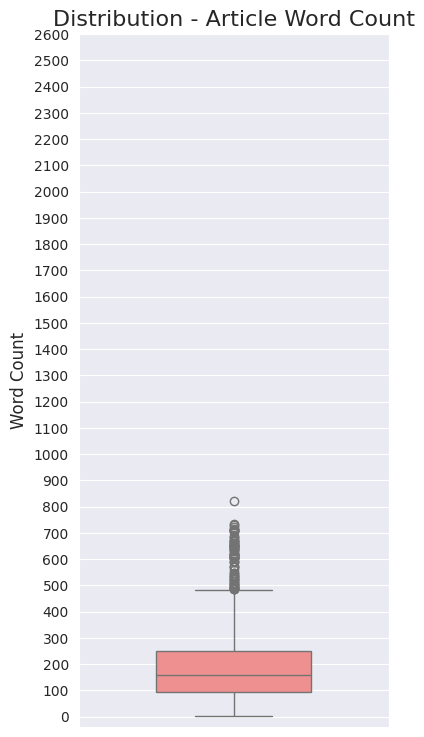

In [ ]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    df['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)
plt.yticks(np.arange(0, 2700, 100))


plt.show()

In [ ]:
# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,gas,5319
1,servic,2537
2,main,1930
3,damag,1746
4,report,1728
5,line,1514
6,leak,1457
7,incid,1430
8,locat,1326
9,caus,1063


<ipython-input-12-ae37a815d556>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
<ipython-input-12-ae37a815d556>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


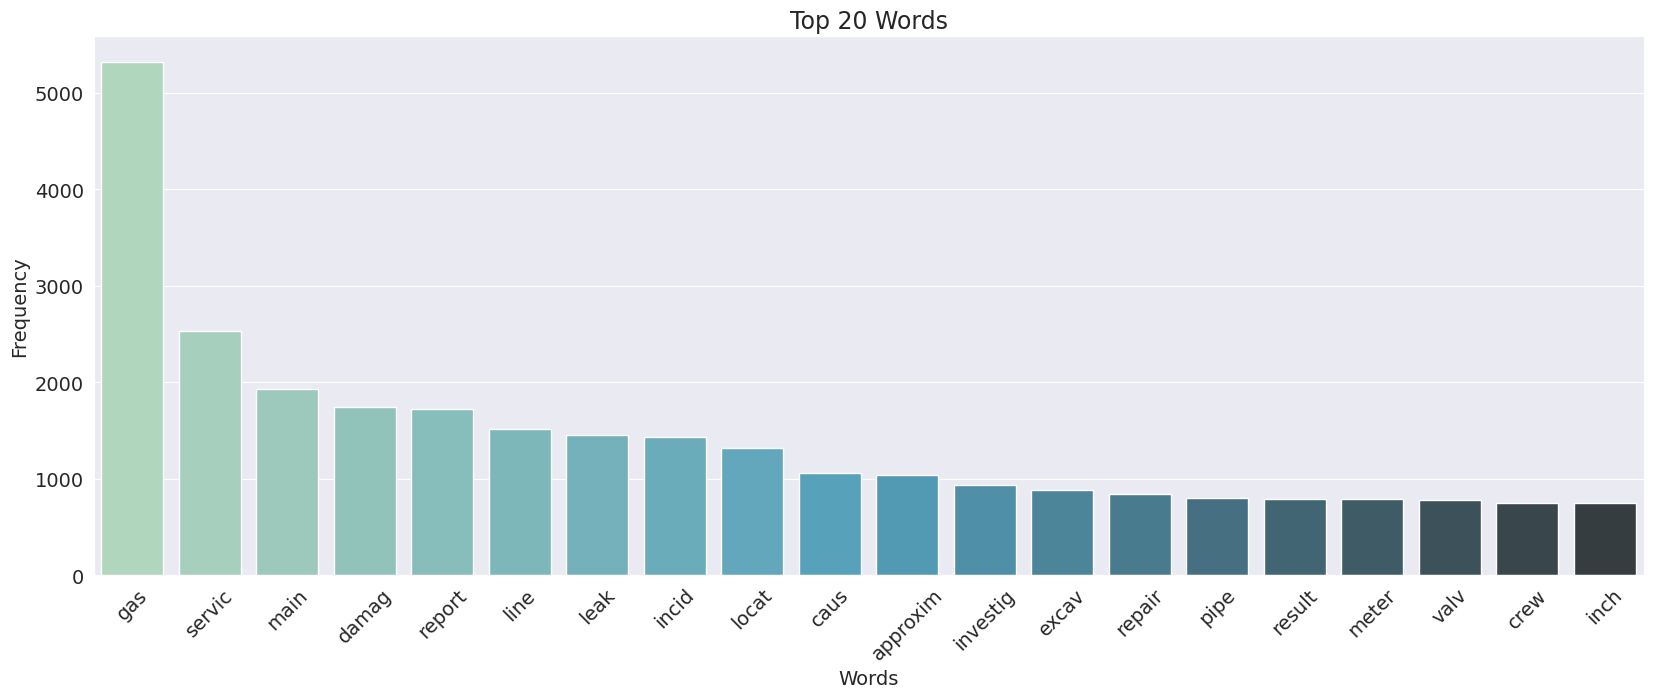

In [ ]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)


plt.show()

In [ ]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

6639

In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
texts = df['processed_text']

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [ ]:
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


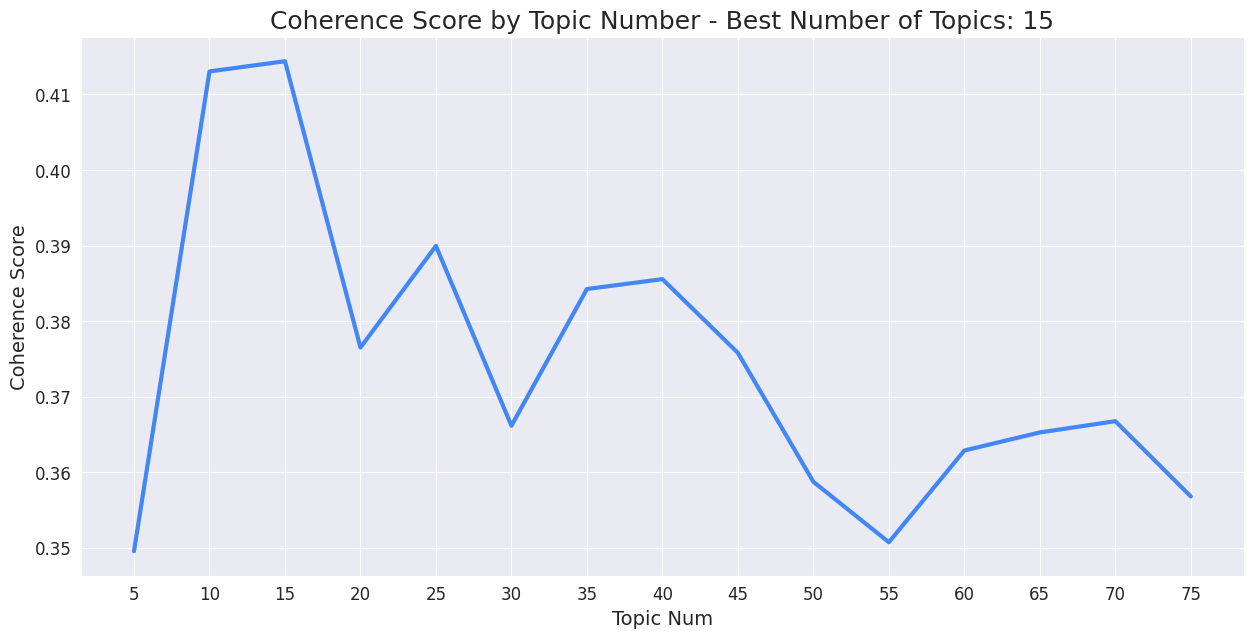

In [ ]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [ ]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 10

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,8,9,topics
0,employe,hospit,burn,ignit,crew,injur,pipe,pm,tap,oper,employe hospit burn ignit crew injur pipe pm t...
1,meter,vehicl,meter set,set,gas meter,riser,driver,ignit,build,hous,meter vehicl set gas riser driver ignit build ...
2,pg,hour,hour pg,approxim hour,report,servic,custom,incid,dot,gas servic,pg hour approxim report servic custom incid do...
3,station,regul,regul station,pressur,valv,relief,psig,district,vehicl,relief valv,station regul pressur valv relief psig distric...
4,incid,socalga,report,cpuc,damag,releas,incid report,dot,crew respond,report dot,incid socalga report cpuc damag releas dot cre...


In [ ]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

,topic_num,topics
0,0,employe hospit burn ignit crew injur pipe pm t...
1,1,meter vehicl set gas riser driver ignit build ...
2,2,pg hour approxim report servic custom incid do...
3,3,station regul pressur valv relief psig distric...
4,4,incid socalga report cpuc damag releas dot cre...


In [ ]:
# Extract the top words for each topic
def topic_table(model, feature_names, n_top_words):
    word_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        # For each topic, get the n_top_words most important words and their scores
        word_dict[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return pd.DataFrame(word_dict)

# Use the 'topic_table' function to get the top words for each topic
topic_df = topic_table(nmf, tfidf_fn, n_top_words).T

# Clean up the words and create readable topics
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1)  # Joining words into a string
topic_df['topics'] = topic_df['topics'].str[0]  # Removing list brackets

# Reset the index to have topic numbers and topics as columns
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

# Display the final DataFrame


,topic_num,topics
0,0,employe hospit burn ignit crew injur pipe pm t...
1,1,meter vehicl meter set set gas meter riser dri...
2,2,pg hour hour pg approxim hour report servic cu...
3,3,station regul regul station pressur valv relie...
4,4,incid socalga report cpuc damag releas incid r...


In [ ]:
topic_df

,topic_num,topics
0,0,employe hospit burn ignit crew injur pipe pm t...
1,1,meter vehicl meter set set gas meter riser dri...
2,2,pg hour hour pg approxim hour report servic cu...
3,3,station regul regul station pressur valv relie...
4,4,incid socalga report cpuc damag releas incid r...
5,5,pipelin approxim approxim hour hour consum ene...
6,6,nan columbia consid columbia gas ohio gas ohio...
7,7,nrc report nrc report center swg center nrc na...
8,8,gds fdni edison report gerc transmiss valv new...
9,9,line servic line servic gas servic hous home t...


from matplotlib import pyplot as plt
topic_df['topic_num'].plot(kind='hist', bins=20, title='topic_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['topic_num']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'topic_num'}, axis=1)
              .sort_values('topic_num', ascending=True))
  xs = counted['topic_num']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = topic_df.sort_values('topic_num', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('topic_num')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
topic_df['topic_num'].plot(kind='line', figsize=(8, 4), title='topic_num')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Modify the code to separate words by commas, ensuring everything is a string
topic_df['topics'] = topic_df.apply(lambda x: ', '.join([str(word) for word in x]), axis=1)

# Reset the index and display topic_num and topics
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

# Display the updated DataFrame
topic_df


,topic_num,topics
0,0,"0, employe hospit burn ignit crew injur pipe p..."
1,1,"1, meter vehicl meter set set gas meter riser ..."
2,2,"2, pg hour hour pg approxim hour report servic..."
3,3,"3, station regul regul station pressur valv re..."
4,4,"4, incid socalga report cpuc damag releas inci..."
5,5,"5, pipelin approxim approxim hour hour consum ..."
6,6,"6, nan columbia consid columbia gas ohio gas o..."
7,7,"7, nrc report nrc report center swg center nrc..."
8,8,"8, gds fdni edison report gerc transmiss valv ..."
9,9,"9, line servic line servic gas servic hous hom..."
